In [1]:
from pyAudioAnalysis import audioTrainTest as aT


C:\Users\Zorigto\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
aT.extract_features_and_train(["classifierData/music","classifierData/speech"], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmSMtemp", False)
aT.file_classification("data/doremi.wav", "svmSMtemp","svm")

trainSVM_feature ERROR: No data found in any input folder!
fileClassification: input model_name not found!


(-1, -1, -1)

In [3]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

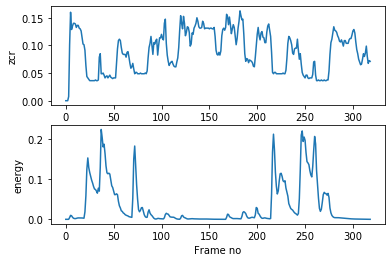

In [4]:
[Fs, x] = audioBasicIO.read_audio_file("doremi.wav")

F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [5]:
audioBasicIO.read_audio_generic("doremi.wav")

(16000, array([[  0],
        [  0],
        [  0],
        ...,
        [-66],
        [-65],
        [-72]], dtype=int16))